<a href="https://www.kaggle.com/code/faressayah/outlier-detection-using-pdf-and-z-score?scriptVersionId=119244165" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### If you are interested in learning statistics check Statistics By Jim. The theory in this post is heavily extracted from this post by Jim: 5 Ways to Find Outliers in Your Data

# What is an Outlier?
Outliers are data points that are too far away from other data points. To be precise, these are uncommon values in the data set. Outliers are a problem for many statistical analyzes and machine learning models because they can cause tests to miss important results or distort actual results and machine learning models fail to generalize.

Unfortunately, there are no rules to definitively detect outliers. Detecting Outliers depends on the subject area and the understanding of the data gathering process. Although there is no solid mathematical definition, there are procedures and statistical tests we can utilize to detect candidates.

In this Notebook, I'll explain what outliers are and why they're a problem, and offer different ways to find them. Additionally, I close this article by comparing different approaches to identify outliers and sharing my favorite approach.

# Outliers and Their Impact
Outliers are a simple concept - they are values that are very different from other data points and can cause problems in statistical procedures. One isolation can distort reality.
Before performing statistical analyzes, potential outliers must be identified. This is the topic of this post. 
There are several ways to find outliers. All of these methods use different methods to find values that are unusual in relation to the rest of the data set. I'll start with visual assessments and then move on to more analytical assessments.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data['LotArea'].isna().sum()

0

# Graphing Your Data to Identify Outliers
Three graphical techniques for identifying outliers can be used. Boxplots, histograms, and scatterplots can highlight outliers.

<AxesSubplot:ylabel='SalePrice'>

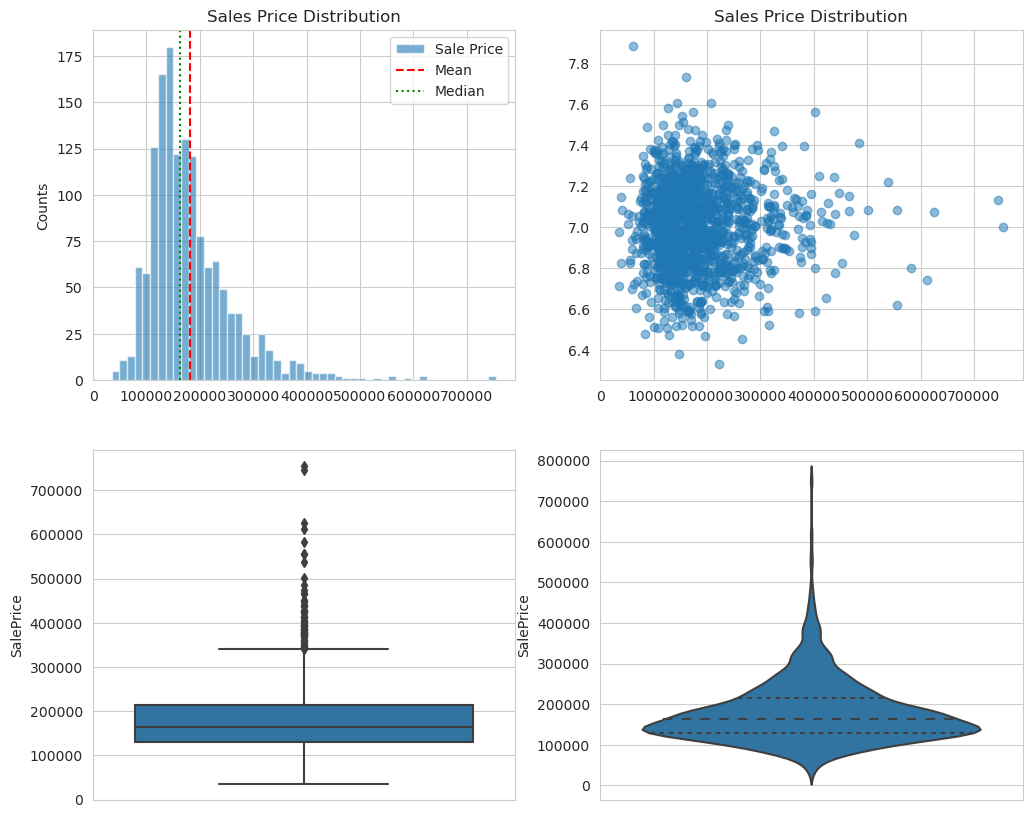

In [4]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data['SalePrice'].hist(bins=50, label='Sale Price', alpha=0.6)
plt.axvline(np.mean(data['SalePrice']), ls='--', c='r', label="Mean")
plt.axvline(np.median(data['SalePrice']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Sales Price Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data['SalePrice'], np.random.normal(7, 0.2, size=data.shape[0]), alpha=0.5)
plt.title("Sales Price Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="SalePrice", data=data)

plt.subplot(2, 2, 4)
sns.violinplot(y="SalePrice", data=data, inner="quartile", bw=0.2)

Most of the outliers found are univariate outliers. We look at the distribution of data for a variable and find values that fall outside the distribution. However, you can use a scatter plot to detect outliers in a multivariate setting.

# Remove Outliers using z-score

Z-scores can determine how odd observation is when your data follow a normal distribution. Z-scores are the number of standard deviations above and below the mean decrease for each value. For example, a Z-score of 2 indicates that the observation is two standard deviations above the mean, while a Z-score of -2 indicates two standard deviations below the mean. The Z score of zero represents a value equal to the mean.
To calculate the Z-score for the observation, take the original measurement, subtract the mean, and divide by the standard deviation. Mathematically, the formula for this process is: z = (X – μ) / σ

The further an observer's Z-score is from zero, the more extravagant they are. The standard cut-off value for finding outliers is Z degrees +/- 3 or greater than zero. The probability distribution below shows the distribution of Z scores in a standard normal distribution. Z degrees above +/- 3 are so severe that you can barely see the shading below the curve.

In [5]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

In [6]:
z_score(data['SalePrice'], threshold=2).sum()

z-score of 2 corresponds to a prob of 0.27%
Rejection 63 points


1397

z-score of 2 corresponds to a prob of 0.27%
Rejection 63 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 22 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 9 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 5 points


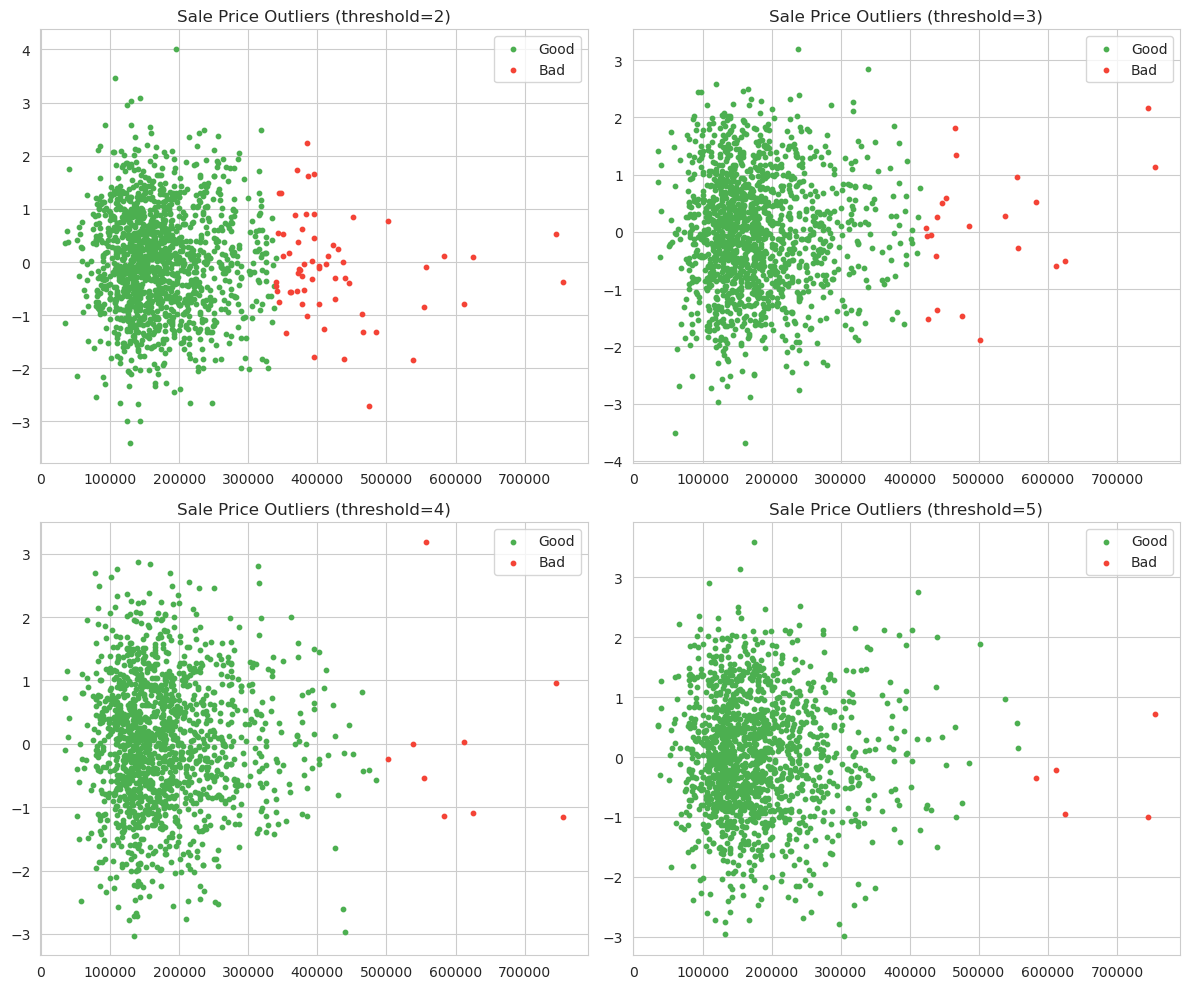

In [7]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['SalePrice'], threshold=threshold)
    plt.scatter(data['SalePrice'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['SalePrice'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Sale Price Outliers (threshold={threshold})")

plt.tight_layout()

# Remove Outliers using Probability Density Function

In [8]:
df = data[['SalePrice', 'LotArea']]

mean, cov = np.mean(df, axis=0), np.cov(df.T)
good = mn(mean, cov).pdf(df) > 0.000000001 / 100

Text(0.5, 1.0, 'Sale Price vs LotArea')

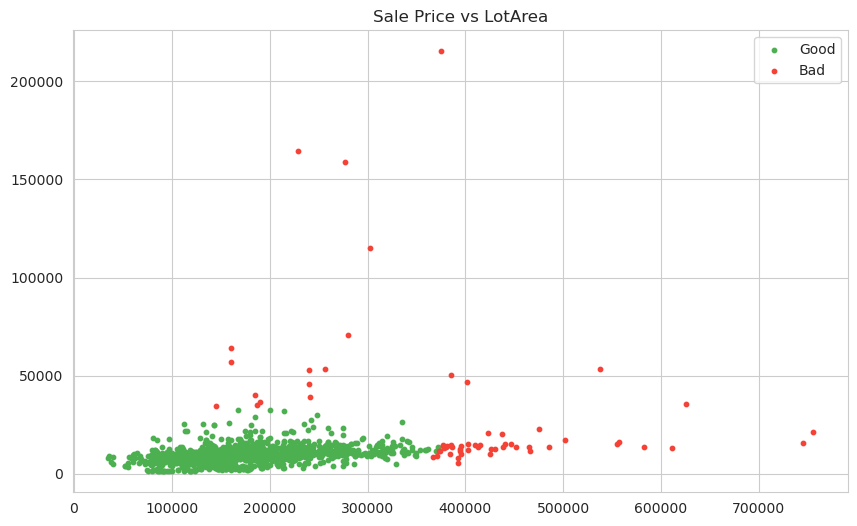

In [9]:
plt.figure(figsize=(10, 6))

plt.scatter(df[good]['SalePrice'], df[good]['LotArea'], s=10, label="Good", color="#4CAF50")
plt.scatter(df[~good]['SalePrice'], df[~good]['LotArea'], s=10, label="Bad", color="#F44336")
plt.legend()
plt.title("Sale Price vs LotArea")

# Automiting Outlier Detection

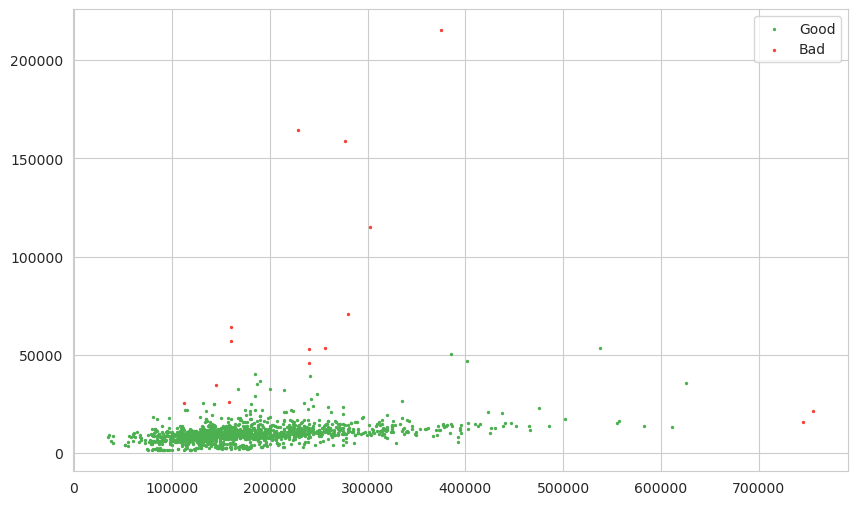

In [10]:
from sklearn.neighbors import LocalOutlierFactor

df = data[['SalePrice', 'LotArea']].to_numpy()

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
good = lof.fit_predict(df) == 1

plt.figure(figsize=(10, 6))
plt.scatter(df[good, 0], df[good, 1], s=2, label='Good', color="#4CAF50")
plt.scatter(df[~good, 0], df[~good, 1], s=2, label='Bad', color="#F44336")
plt.legend();